In [ ]:
# connection to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
from collections import Counter

In [ ]:
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [ ]:
ozempic = pd.read_csv('/content/drive/MyDrive/Datasets/Semantic_Analysis/semantic_analysis_ozempic.csv')
mounjaro = pd.read_csv('/content/drive/MyDrive/Datasets/Semantic_Analysis/semantic_analysis_mounjaro.csv')
rybelsus = pd.read_csv('/content/drive/MyDrive/Datasets/Semantic_Analysis/semantic_analysis_rybelsus.csv')
trulicity = pd.read_csv('/content/drive/MyDrive/Datasets/Semantic_Analysis/semantic_analysis_trulicity.csv')
wegovy = pd.read_csv('/content/drive/MyDrive/Datasets/Semantic_Analysis/semantic_analysis_wegovy.csv')

In [ ]:
ozempic.columns

Index(['Unnamed: 0', 'Topic', 'Count', 'Name', 'Representation',
       'Representative_Docs'],
      dtype='object')

In [ ]:
ozempic[['Representation', 'Count']]

,Representation,Count
0,"['losing weight', 'lose weight', 'diet', 'weight loss', 'lost weight', 'taking ozempic', 'appetite', 'eat', 'healthy', 'eating']",502
1,"['medication', 'taking ozempic', 'started taking', '1mg', 'weight', '25mg', 'injection', 'nausea', 'food', 'doctor']",410
2,"['taking ozempic', 'ozempic weight', 'obesity', 'lose weight', 'medication', 'start ozempic', 'diabetes', 'prescription', 'prescribed', 'ozempic']",371
3,"['1mg', 'pcos', 'started ozempic', 'ozempic months', 'weight loss', 'diet', 'goal weight', 'ozempic', 'doctor', 'a1c']",351
4,"['insulin', 'ozempic', 'diabetes', 'ozempic wegovy', 'prescribe', 'prescription', 'cover ozempic', 'medications', 'diabetic', 'medication']",303
5,"['taking ozempic', 'starting ozempic', 'started ozempic', 'start ozempic', 'using ozempic', 'ozempic journey', 'ozempic', 'ozempic wegovy', 'ozempic face', 'mounjaro ozempic']",266
6,"['appetite suppression', 'started ozempic', 'ozempic', '1mg', 'ozempic months', 'binge eating', '25mg', 'diet', 'week ozempic', 'cravings']",261
7,"['ozempic', 'struggled weight', 'lose weight', 'weight loss', 'diet', 'diabetes', 'overweight', 'bmi', 'fat', 'eating']",254
8,"['loss drug', 'loss drugs', 'glp medications', 'ozempic', 'ozempic wegovy', 'medications like', 'lose weight', 'glp drugs', 'diabetes', 'wegovy ozempic']",251
9,"['1mg', '5mg', '2mg', 'dosage', '25mg', '25 mg', 'ozempic shot', 'doses', 'ozempic', 'ozempic pen']",205


In [ ]:
mounjaro[['Representation', 'Count']]

,Representation,Count
0,"['taking mounjaro', 'diabetes', 'mounjaro months', '5mg', 'mounjaro', '10mg', 'started mounjaro', 'medication', 'sugar', 've mounjaro']",869
1,"['taking mounjaro', 'metformin', 'medication', 'dosage', 'mounjaro', '5mg', '10mg', 'started mounjaro', 'injection', 've mounjaro']",621
2,"['prescribe', 'prescription', 'prescribed', 'pharmacies', 'pharmacy', 'medication', 'diabetes', '5mg', 'drug', 'nhs']",423
3,"['weight loss', 'bmi', 'started mounjaro', 'mounjaro', 'journeys weight', 'weight', 'journey updates', 'lbs', 'lose', 'updates graphs']",395
4,"['diabetes', 'insulin', 'blood sugar', 'diabetic', 'type diabetes', 'metformin', 'glucose', '5mg', 'medication', 'sugar']",358
5,"['mounjaro', '5mg', '10mg', 'diabetes', '15mg', 'medication', 'mg', 'dosing', 'insurance', 'drug']",286
6,"['mounjaro', 'update', 'mp', 'eat', 'food', 'went', 'want', 'hello', 'weight', 'going']",277
7,"['mounjaro', 'prescription', '5mg', 'pharmacy', 'pharmacies', 'patients', 'diabetes', 'fda', 'doses', 'treatment']",267
8,"['loss drugs', 'glp medications', 'mounjaro', 'medications', 'medication', 'meds', 'glucagon', 'ozempic mounjaro', 'drug', 'wegovy mounjaro']",247
9,"['compounded tirzepatide', 'weight loss', 'pcos', 'lose weight', 'started tirzepatide', '5mg', 'medication', 'diet', 'mg', 'goal weight']",243


In [ ]:
rybelsus[['Representation', 'Count']]

,Representation,Count
0,"['insulin', 'diabetes', 'diabetic', 'taking rybelsus', '3mg month', '3mg', 'prescribed', '7mg', '3mg rybelsus', 'rybelsus 3mg']",223
1,"['metformin', 'medication', 'pill', '7mg', '3mg', 'rybelsus 3mg', 'weight loss', '3mg rybelsus', 'taking rybelsus', '14mg']",146
2,"['taking rybelsus', '14mg rybelsus', '7mg rybelsus', 'rybelsus 3mg', 'diabetes', 'prescribed', 'supplements', '7mg tablets', 'dosage', 'medication']",94
3,"['ozempic injection', 'rybelsus oral', 'switched rybelsus', 'prescribed', 'dosage', '3mg', '1mg', 'rybelsus', '5mg', 'injection']",90
4,"['weight management', 'weight loss', 'prescribed', 'diabetes', 'semaglutide medication', 'fda', 'daily dose', 'medication', 'healthy', 'type diabetes']",78
5,"['lose weight', 'weight loss', 'started taking', '3mg', '7mg', 'months mg', '14mg', 'started rybelsus', 'retatrutide', 'medication']",76
6,"['started metformin', 'taking metformin', 'metformin', 'taking rybelsus', '500mg', '3mg', '7mg', 'insulin', 'medications', 'medication']",75
7,"['weight loss', 'glucagon', 'obesity', 'diabetes', 'treatment', 'pharmaceuticals', 'supplements', 'pharmaceutical', 'fda', 'type diabetes']",71
8,"['3mg', 'appetite suppression', 'dosage', '14mg', '7mg', 'diet', 'medication', 'a1c', 'nausea', '3mg 30']",69
9,"['loss meds', 'canadian insulin', 'insulin offers', 'insulin https', 'prescription', 'insulin', 'buy rybelsus', 'pharmacy', 'pharmacies', 'rybelsus']",57


In [ ]:
trulicity[['Representation', 'Count']]

,Representation,Count
0,"['t2 diabetic', 'diabetes', 'type diabetes', 'diabetic', 'blood sugar', 'insulin', 'glucose', 'metformin', 'diagnosed', 'diet']",105
1,"['trulicity injections', 'injection', 'injections', 'trulicity injection', 'injected', '5mg', 'injecting', 'injection site', 'inject', 'inject trulicity']",89
2,"['diabetes', 'diabetic', 'type diabetes', 'metformin', 'diagnosis', 'prescription', 'cigna', 'medicare', 'pharmacy', 'pcos']",85
3,"['type diabetic', 'insulin', 'blood sugar', 'metformin', 'type diabetes', 'sugar levels', 'diabetes', 'diabetic', 'keto', 'low carb']",72
4,"['prednisone', 'pcos', 'metformin trulicity', 'diabetes', 'type diabetes', 'methotrexate', 'diabetic', 'metformin', 'diagnosed', 'rheumatoid']",67
5,"['blood sugar', 'type diabetes', 'diabetes', 'insulin', 'diabetic', 'glucagon', 'glp agonists', 'igf level', 'glycemic', 'treatment']",61
6,"['type diabetic', 'diabetes', 'diabetic', 'insulin', 'type diabetes', 'metformin', 'endocrinologist', 'dosage', 'highest dose', 'prescribed mounjaro']",56
7,"['diagnosed diabetes', 'diabetes', 'blood sugars', 'type diabetes', 'metformin', 'diabetic', 'metformin trulicity', 'insulin', 'glucose', 'diet']",55
8,"['blood sugar', 'insulin', 'sugar levels', 'diabetes', 'type diabetes', 'metformin', 'diabetic', 'glucose', 'got diagnosed', 'metformin jardiance']",47
9,"['glucose control', 'insulin', 'weeks glucose', 'diabetes', 'glucose', 'prescription', 'trulicity', 'fda', 'medication', 'eli lilly']",44


In [ ]:
wegovy[['Representation', 'Count']]

,Representation,Count
0,"['taking wegovy', 'lost weight', 'lose weight', 'weight loss', '1mg', '4mg', '7mg', '5mg', 'dosage', 'appetite']",581
1,"['weight', 'medication', 'injection', 'zofran', 'eat', 'doctor', 'taking wegovy', '1mg', 'nausea', 'constipation']",391
2,"['1mg', 'prescription', 'injections', '5mg', 'dosage', 'prescribed', '25mg', 'medication', 'injection', 'doses']",381
3,"['prescription', 'prescribed', 'medications', 'medication', 'pharmacy', 'meds', 'drug', 'ozempic', 'aetna', 'diabetic']",300
4,"['lost weight', 'goal weight', 'started wegovy', 'weight loss', 'starting weight', 'lbs', 'starting wegovy', 'wegovy', 'progress', 'taking']",299
5,"['started wegovy', 'wegovy', 'goal weight', 'diet', 'weight loss', 'lose weight', 'lbs', 'healthy', 'weight', 'bmi']",292
6,"['goal weight', 'lose weight', 'taking wegovy', 'weight loss', 'lbs', 'diet', 'weight', 'bmi', 'started wegovy', 'healthy']",288
7,"['4mg', '7mg', 'prescribed wegovy', '5mg', '1mg', '25mg', 'dosage', 'doses', 'prescription', 'prescribed']",281
8,"['wegovy', '1mg', 'medication', 'appetite', '5mg', '25mg', 'lbs', 'weight', 'cravings', 'nausea']",273
9,"['taking wegovy', 'started wegovy', 'wegovy', '1mg', 'week wegovy', 'wegovy months', '25mg', 'wegovy weeks', 've wegovy', 'appetite suppression']",247


In [ ]:
# importing original datasets
df_ozempic = pd.read_csv("/content/drive/MyDrive/Datasets/Scrapings/ozempic_dataset.csv")
df_mounjaro = pd.read_csv("/content/drive/MyDrive/Datasets/Scrapings/mounjaro_dataset.csv")
df_rybelsus = pd.read_csv("/content/drive/MyDrive/Datasets/Scrapings/rybelsus_dataset.csv")
df_trulicity = pd.read_csv("/content/drive/MyDrive/Datasets/Scrapings/trulicity_dataset.csv")
df_wegovy = pd.read_csv("/content/drive/MyDrive/Datasets/Scrapings/wegovy_dataset.csv")

In [ ]:
df_ozempic.columns

Index(['title', 'score', 'tag', 'year', 'subreddit', 'post_id', 'created_date',
       'num_comments', 'selftext', 'upvote_ratio'],
      dtype='object')

In [ ]:
# counting words

import pandas as pd
import re

column = "selftext"

group_map = {
    # Uso principale
    "weight loss": ["weight loss", "lose weight", "losing weight", "lost weight", "lbs", "diet"],
    "appetite eating": ["appetite", "eat", "eating", "healthy eating", "hunger", "fullness"],

    # Contesto medic
    "medication dosage": ["mg", "dose", "dosing", "1mg", "0.5mg", "2mg", "pill", "tablet", "injection"],

    # Effetti collaterali comuni
    "gastrointestinal problems": ["nausea", "vomiting", "constipation", "diarrhea", "stomach", "cramps", "bloating", "gas"],
    "feel of fatigue": ["tired", "fatigue", "weak", "weakness", "exhausted"],
    "mental health problems": ["anxiety", "depression", "panic", "sad"],
}


datasets = {
    "Ozempic": df_ozempic,
    "Mounjaro": df_mounjaro,
    "Rybelsus": df_rybelsus,
    "Trulicity": df_trulicity,
    "Wegovy": df_wegovy
}

results = {}
for name, df in datasets.items():
    total_posts = len(df)
    risultati = {}

    for group, variants in group_map.items():
        count = 0
        for v in variants:
            count += df[column].astype(str).str.lower().str.contains(v.lower()).sum()
        # percentuale normalizzata
        percent = round(100 * count / total_posts, 2) if total_posts > 0 else 0
        risultati[group] = percent

    results[name] = risultati

df_results = pd.DataFrame(results).T



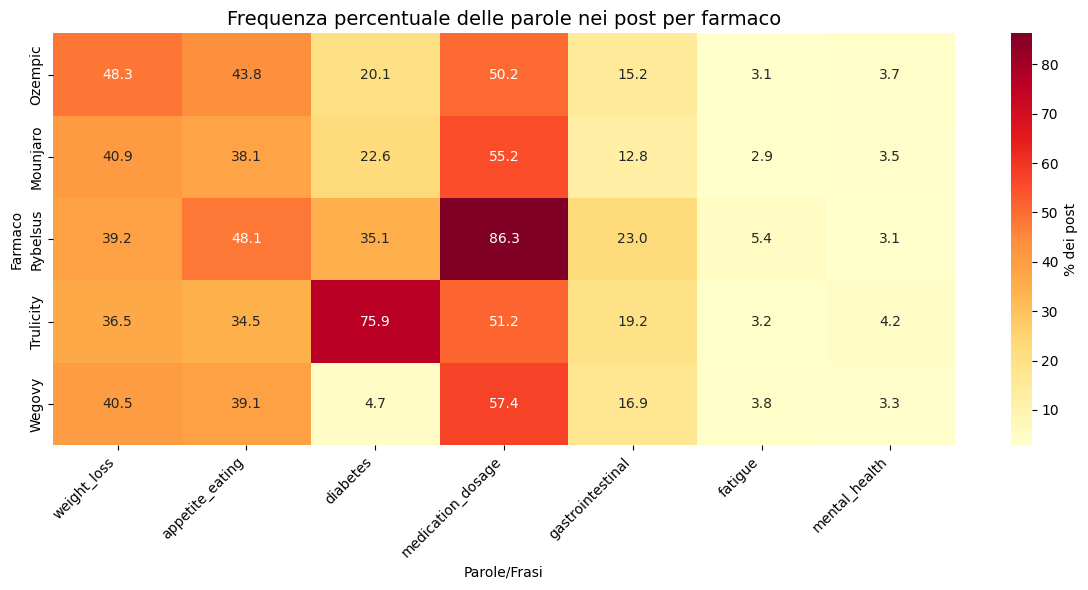

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# === HEATMAP ===
plt.figure(figsize=(12, 6))
sns.heatmap(df_results, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': '% dei post'})
plt.title("Frequenza percentuale delle parole nei post per farmaco", fontsize=14)
plt.ylabel("Farmaco")
plt.xlabel("Parole/Frasi")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

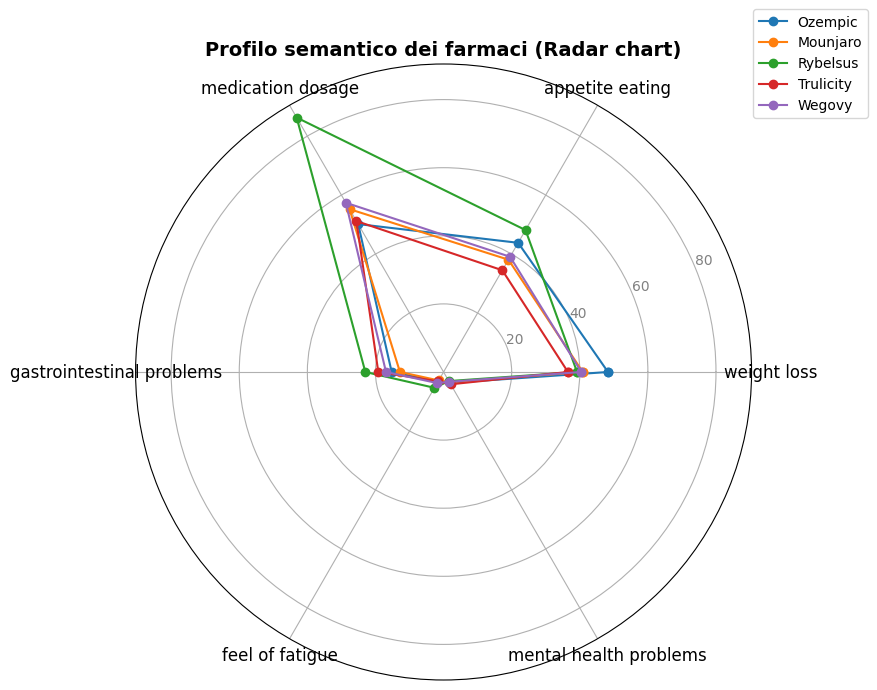

In [ ]:
import numpy as np
# === Calcolo radar chart dai tuoi df_results ===
labels = df_results.columns.tolist()
num_vars = len(labels)

# Angoli per i raggi del radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # chiusura cerchio

# Creazione della figura
plt.figure(figsize=(8, 8))

for idx, row in df_results.iterrows():
    values = row.tolist()
    values += values[:1]  # chiusura poligono
    plt.polar(angles, values, marker='o', label=idx)

# Imposto le etichette sugli assi
plt.xticks(angles[:-1], labels, size=12)
plt.yticks(color="grey", size=10)
plt.title("Profilo semantico dei farmaci (Radar chart)", size=14, weight='bold')
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

plt.show()